In [1]:
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X , y = mnist['data'],mnist['target'] 

In [4]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

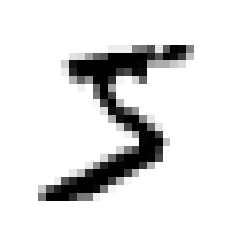

In [7]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image , cmap='binary')
plt.axis('off')
plt.show()


In [8]:
y[0]

'5'

In [9]:
y = y.astype(np.uint8)
X_train , X_test , y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [10]:
type(y)

numpy.ndarray

In [11]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=4,weights='distance')
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [13]:
y_knn_pred = knn_clf.predict(X_test)

In [14]:
y_knn_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [15]:
from sklearn.metrics import accuracy_score
acc_scor = accuracy_score(y_test , y_knn_pred )

In [16]:
acc_scor


0.9714

In [17]:
from scipy.ndimage.interpolation import shift
def shift_image(digit_image , dx , dy , new=0):
    return shift(digit_image.reshape(28,28),[dx ,dy], cval=new).reshape(784)

In [18]:
shift_image(some_digit,5,1,100)

array([ 1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  1.00000000e+02,  1.00000000e+02,  1.00000000e+02,
        1.00000000e+02,  

In [19]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

enter the index number of digit : 70


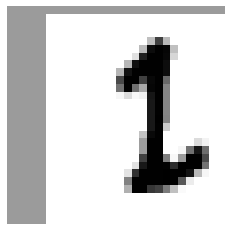

In [20]:

from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

w=int(input("enter the index number of digit : "))
plot_digit(shift_digit(X[w] , 5, 1, new=100))

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... n_neighbors=3, weights=uniform, score=0.972, total=21.7min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 21.7min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.971, total=21.8min
[CV] n_neighbors=3, weights=uniform ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 43.4min remaining:    0.0s


[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=21.6min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.969, total=20.4min
[CV] n_neighbors=3, weights=uniform ..................................
[CV] ...... n_neighbors=3, weights=uniform, score=0.970, total=20.3min
[CV] n_neighbors=3, weights=distance .................................
[CV] ..... n_neighbors=3, weights=distance, score=0.972, total=20.1min
[CV] n_neighbors=3, weights=distance .................................


In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

# Question 2

In [ ]:
from scipy.ndimage.interpolation import shift

In [ ]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [ ]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [ ]:
knn_clf.fit(X_train_augmented, y_train_augmented)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)